In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_files = ['2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']

In [3]:
for filename in data_files:
    data = pd.read_csv(filename)
    print(filename, data.shape)

2010.csv (51, 15)
2011.csv (53, 15)
2012.csv (35, 15)
2013.csv (71, 15)
2014.csv (58, 15)
2015.csv (95, 15)
2016.csv (80, 15)
2017.csv (65, 15)
2018.csv (64, 15)
2019.csv (31, 15)


In [4]:
#concatenating all csv files

all_top_songs = pd.DataFrame(pd.read_csv(data_files[0]))

for x in range(1,len(data_files)):
    data = pd.read_csv(data_files[x])
    df = pd.DataFrame(data)
    all_top_songs = pd.concat([all_top_songs,df], axis=0)

In [5]:
all_top_songs

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
27,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
28,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
29,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [6]:
#dropping unneccessary Unnamed column and resetting index

all_top_songs.drop(['Unnamed: 0'], axis=1, inplace=True)
all_top_songs = all_top_songs.reset_index(drop=True)
all_top_songs

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [7]:
#exporting csv file

all_top_songs.to_csv('top_spotify_songs.csv', index=False)

In [8]:
all_top_songs.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

### What is the most popular song in the dataset?

In [9]:
most_pop = all_top_songs.sort_values(by=['pop'], ascending=False)
most_pop.head(1)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


The most popular song is Memories by Maroon 5.

### What artist has the most songs in the dataset?

In [10]:
all_top_songs['artist'].value_counts()

Katy Perry             17
Justin Bieber          16
Rihanna                15
Maroon 5               15
Lady Gaga              14
                       ..
Iggy Azalea             1
5 Seconds of Summer     1
Michael Jackson         1
Disclosure              1
Daddy Yankee            1
Name: artist, Length: 184, dtype: int64

Katy Perry has the most songs in the dataset.


### What is the most popular genre of music in the dataset?

In [11]:
genre = all_top_songs.pivot_table(index='top genre', values='pop', aggfunc='sum').reset_index()

In [12]:
genre = genre.sort_values(by=['pop'], ascending=False)
genre.head(1)

,top genre,pop
25,dance pop,21047


dance pop is the most popular genre in the dataset

### Are there any songs in the dataset more than once?

In [13]:
all_top_songs.duplicated(subset=['title', 'artist']).sum()

16

In [14]:
all_top_songs.loc[all_top_songs.duplicated(subset=["title", "artist"], keep='last')]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
11,Marry You,Bruno Mars,pop,2010,145,83,62,-5,10,48,230,33,4,73
46,Written in the Stars (feat. Eric Turner),Tinie Tempah,dance pop,2010,91,95,64,-4,18,57,220,6,7,52
48,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
113,We Are Never Ever Getting Back Together,Taylor Swift,pop,2012,86,68,63,-6,12,75,193,1,9,75
178,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2013,130,62,76,-6,9,52,241,1,18,65
270,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
271,Love Yourself,Justin Bieber,canadian pop,2015,100,38,61,-10,28,52,234,84,44,83
274,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,81
280,Stitches,Shawn Mendes,canadian pop,2015,150,75,75,-7,5,76,207,2,7,78


in total there are 16 songs in the dataset more than once

### Is there a relationship between popularity and danceability?

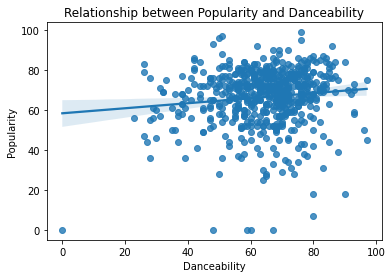

In [15]:
sns.regplot(data=all_top_songs, x='dnce', y='pop')
plt.title('Relationship between Popularity and Danceability', fontsize = 12)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

There is a weak positive correlation between popularity and danceability

### Does having a higher bpm lead to having a higher energy score?

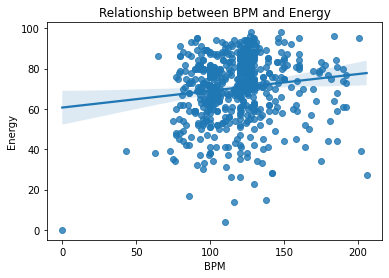

In [16]:
sns.regplot(data=all_top_songs, x='bpm', y='nrgy')
plt.title('Relationship between BPM and Energy', fontsize = 12)
plt.xlabel("BPM")
plt.ylabel("Energy")
plt.show()

There is a weak positive correlation between bpm and engery score

### Which genre has the highest energy score?

In [17]:
nrgy_score = all_top_songs.pivot_table(index='top genre', values='nrgy', aggfunc='sum').reset_index()
nrgy_score = nrgy_score.sort_values(by=['nrgy'], ascending=False)
nrgy_score.head(1)

,top genre,nrgy
25,dance pop,23814


Dance Pop has the highest energy score